<a id="0"></a> <br>

# ${\textbf{Contents}}$
### 1. [Project Overview](#1)

### 2. [Preparing data for analysis](#2)

### 3. [Data Preprocessing](#3)

### 4. [Exploratory Data Analysis](#4)
* ##### [Descriptive Statistics](#7)
* ##### [Correlation Heatmap](#8)
* ##### [Scatter plot](#9)
### 5. [Feature Engineering](#5)

### 6. [Customer Segmentation using unsupervised ML](#6)
* #### [Data Standardization](#10)
* #### [Optimal number of clusters : The Elbow method, Silhouette Score and Gap Statistics](#11)
* #### [K-Means Clustering](#12)
* #### [Hierarchical Clustering](#13)


<a id="1"></a> <br>
## Project Overview : Customer Segmentation with Python

Objective: Investigate the impact of acquisition channels on customers learning outcomes on a learning platform and identify key geographic regions where this platform is discovered, particularly through social media like YouTube or Facebook. This project uses real-world customer data for market segmentation, involving data preprocessing, exploratory data analysis, feature engineering, and the application of k-means and hierarchical clustering techniques.

Dataset Highlights:

* Minutes_watched : learning time spent on the platform (after starting a course).
* CLV : Customer Lifetime Value.
* Channel Variable: Describes the platform discovery source, including Google, Facebook, YouTube, LinkedIn, Twitter, Instagram, Friend recommendations, and Others.
* Region Variable: Locates customers based on geographical locations, categorizing them into 0 (USA and Canada), 1 (Europe), and 2 (The rest of the world).

Techniques Applied:

* Data Preprocessing.
* Exploratory Data Analysis (EDA).
* Feature Engineering.
* K-means Clustering.
* Hierarchical Clustering.

<a id="2"></a> <br>
## Preparing data for analysis

### Setting up the environment

In [1]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

### Loading the data

In [2]:
customer_seg_df = pd.read_csv('../Projects/customer-segmentation-in-marketing-project-files/customer_segmentation_data.csv', index_col=False)

In [3]:
customer_seg_df.shape

(3834, 4)

In [4]:
customer_seg_df.sample(10)

,minutes_watched,CLV,region,channel
1418,405.0,19.00,2,2
878,807.0,119.00,0,4
2720,1612.0,174.37,0,4
1908,4.0,62.58,2,1
2073,NaN,119.00,2,1
3040,656.0,97.00,2,4
2787,340.0,78.87,2,7
2302,1088.0,119.00,2,1
2959,8941.0,64.80,0,3
3683,173.0,82.04,2,3


### Data info

In [5]:
customer_seg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


<a id="3"></a> <br>
## Data Preprocessing

### Evaluating Data Completeness: Assessing Missing Values

In [6]:
customer_seg_df.isnull().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

Our dataset reveals exclusive missing values within the 'minutes_watched' category. Given our data collection timeline, these gaps signify instances where customers have enrolled and made a purchase but are yet to commence their learning journey.

With a total of 109 missing values identified in the first column, let's take proactive steps to address this data gap and ensure the completeness of our analysis.

### Precision in Data Analysis: Identifying Indices of Missing Values

In [7]:
# Create boolean mask for missing values
missing_values_mask = customer_seg_df.isnull()

# Get the indices of missing values using the mask
missing_indices = customer_seg_df.index[missing_values_mask.any(axis=1)].tolist()

print("Indices of missing values:")
print(missing_indices)
print(f"As you can see we have {len(missing_indices)} missing values")

Indices of missing values:
[215, 368, 470, 545, 764, 886, 918, 1039, 1070, 1156, 1216, 1280, 1466, 1811, 1924, 2054, 2058, 2067, 2072, 2073, 2074, 2096, 2117, 2132, 2151, 2155, 2161, 2169, 2172, 2173, 2178, 2185, 2197, 2201, 2202, 2207, 2219, 2239, 2262, 2266, 2267, 2314, 2326, 2370, 2411, 2447, 2458, 2502, 2521, 2588, 2595, 2644, 2664, 2675, 2683, 2708, 2712, 2752, 2758, 2761, 2798, 2804, 2808, 2840, 2842, 2926, 2975, 3024, 3054, 3056, 3103, 3220, 3225, 3231, 3243, 3252, 3261, 3284, 3285, 3286, 3288, 3300, 3308, 3310, 3325, 3565, 3577, 3592, 3608, 3630, 3654, 3655, 3680, 3686, 3688, 3692, 3704, 3778, 3784, 3790, 3797, 3799, 3803, 3804, 3809, 3813, 3816, 3822, 3833]
As you can see we have 109 missing values


In [8]:
# Check the value of an element in a certain index
customer_seg_df['minutes_watched'][215]

nan

### Optimizing Data Integrity: Filling Missing Values with Appropriate Formats

In [9]:
# Select numeric columns
numeric_cols = customer_seg_df.select_dtypes(include='number').columns

''' Fill empty values by corresponding data (0, mean, 'NA', etc.) according to columns data 
    we know that we will be filling missing values in the "minutes_watched" column, 
    as a result, using the mean value is not appropriat here because it will introduce inaccuracies in our results 
    as we shouldn't include customers who haven't started learning in this analysis '''

customer_seg_df[numeric_cols] = customer_seg_df[numeric_cols].fillna(0)

In [10]:
# Check again to see if data is filled correctly
customer_seg_df['minutes_watched'][215]

0.0

In [11]:
# Convert minutes watched and CLV (you can comment this section if you want to keep the original data format)
customer_seg_df['minutes_watched'] = customer_seg_df['minutes_watched'].astype(int)
customer_seg_df['CLV'] = customer_seg_df['CLV'].astype(int)

### Preserving Progress: Saving the Cleaned Dataset

In [12]:
# Save cleaned df
customer_seg_df.to_csv('../Projects/customer-segmentation-in-marketing-project-files/customer_seg_cleaned.csv')

In [13]:
customer_seg_cleaned_df = pd.read_csv('../Projects/customer-segmentation-in-marketing-project-files/customer_seg_cleaned.csv', index_col=0)
customer_seg_cleaned_df.sample(10)

,minutes_watched,CLV,region,channel
3383,953,42,2,1
2802,358,86,2,7
3742,416,138,0,6
3069,2482,70,0,1
3458,510,97,0,6
2718,1110,82,2,6
1812,84,149,1,7
972,1717,62,2,2
2048,203,141,1,8
3466,455,174,2,3


<a id="4"></a> <br>
## Exploratory Data Analysis (EDA)

<a id="7"></a><br>
### Descriptive Statistics

In [14]:
customer_seg_cleaned_df[['minutes_watched','CLV']].describe()

,minutes_watched,CLV
count,3834.000000,3834.000000
mean,1916.028169,118.017214
std,7303.052488,70.443918
min,0.000000,0.000000
25%,137.000000,62.000000
50%,480.500000,119.000000
75%,1464.000000,149.000000
max,288508.000000,626.000000


In the dataset, we have gathered insights from 3834 observations across two key variables: minutes_watched and CLV (Customer Lifetime Value). For minutes_watched, the average viewing time stands at approximately 1916 minutes, with a notable standard deviation of 7303 minutes, indicating significant variability in viewing patterns. The CLV variable exhibits a mean value of $118.02, with a standard deviation of $70.44, suggesting diversity in customer lifetime values. 

<a id="8"></a><br>
### Visualizing Relationships: Creating a Correlation Heatmap

In [15]:
# Let's describe some key elements of our dataset
variables_corr = customer_seg_cleaned_df.corr()
variables_corr

,minutes_watched,CLV,region,channel
minutes_watched,1.000000,0.113996,0.040100,-0.003718
CLV,0.113996,1.000000,-0.273906,-0.026191
region,0.040100,-0.273906,1.000000,0.015098
channel,-0.003718,-0.026191,0.015098,1.000000


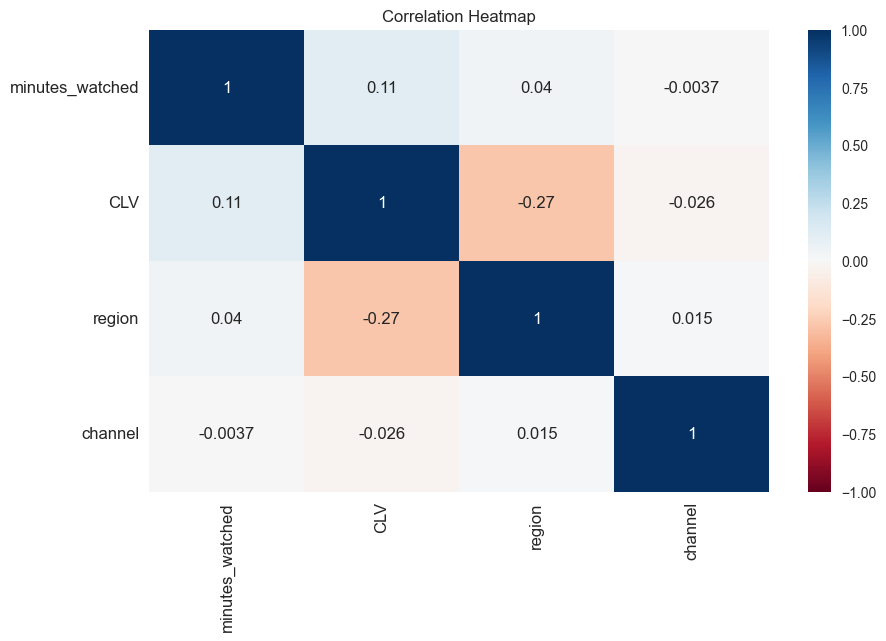

In [16]:
plt.figure(figsize = (10, 6))
s = sns.heatmap(customer_seg_cleaned_df.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

The customer lifetime value ("CLV") and the "minutes_watched" variables are positively correlated. Although, the correlation between these two variables remain weak since the correlation coefficient is close to 0.

Concerning "region" and "channel", they are categorical data and don't indicate meaningful information in the actual state. We will be creating dummy data to get insights from these two variables.

### Box plot

[]

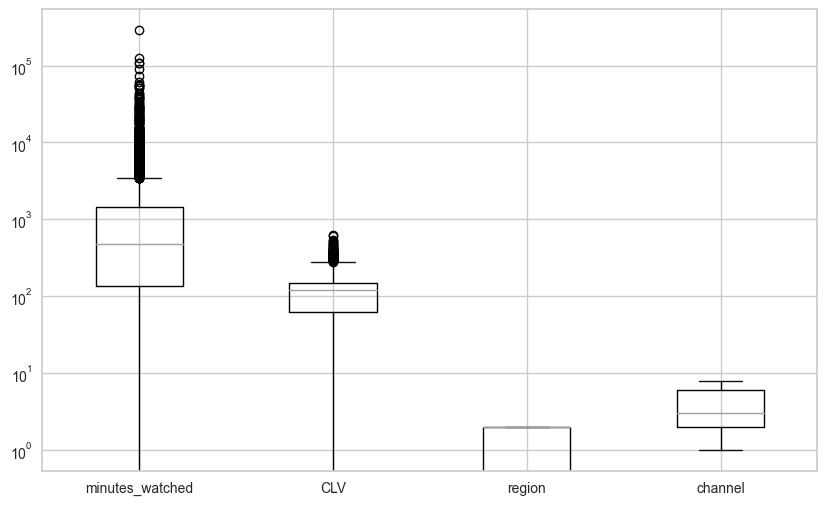

In [17]:
customer_seg_cleaned_df.boxplot(figsize=(10,6))
plt.semilogy() # adjust y-axis to logarithmic to avoid outliers effect

{'whiskers': [<matplotlib.lines.Line2D at 0x28417e210>,
 'caps': [<matplotlib.lines.Line2D at 0x28417ca10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2841715d0>],
 'medians': [<matplotlib.lines.Line2D at 0x284148b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x283ecca90>],
 'means': []}

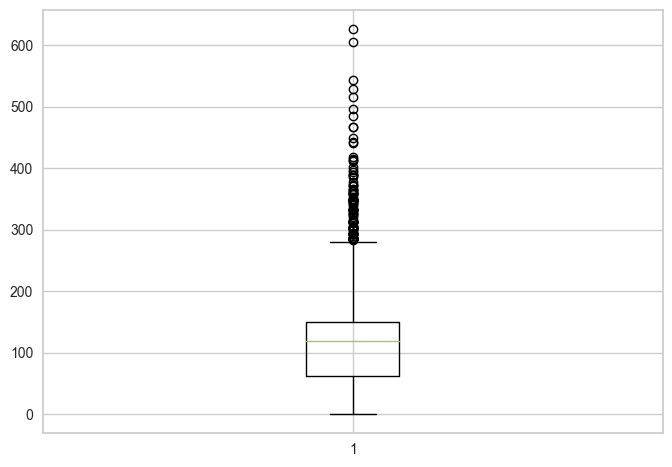

In [18]:
plt.boxplot(customer_seg_cleaned_df['CLV'])

In examining the Customer Lifetime Value (CLV) distribution, it is observed that the majority of values are concentrated within the range of 50 to 150. However, it is crucial to note the presence of outliers, which could significantly impact our analysis. Outliers, by virtue of their deviation from the typical pattern, warrant careful consideration as they may introduce variability and influence the overall findings of our analysis.

[]

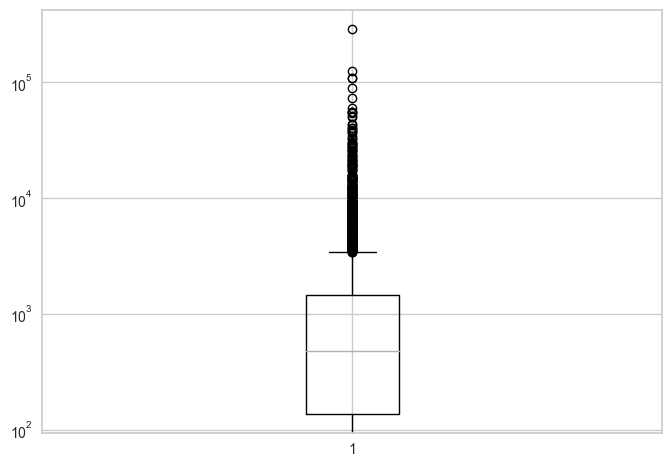

In [19]:
plt.boxplot(customer_seg_cleaned_df['minutes_watched'])
plt.semilogy()

Outliers can potentially impact our analysis. However, the broader distribution of time spent on the platform is primarily concentrated within the range of 110 minutes to 1200 minutes.

<a id="9"></a><br>
### Analyzing Customer Lifetime Value Trends Based on Minutes Watched

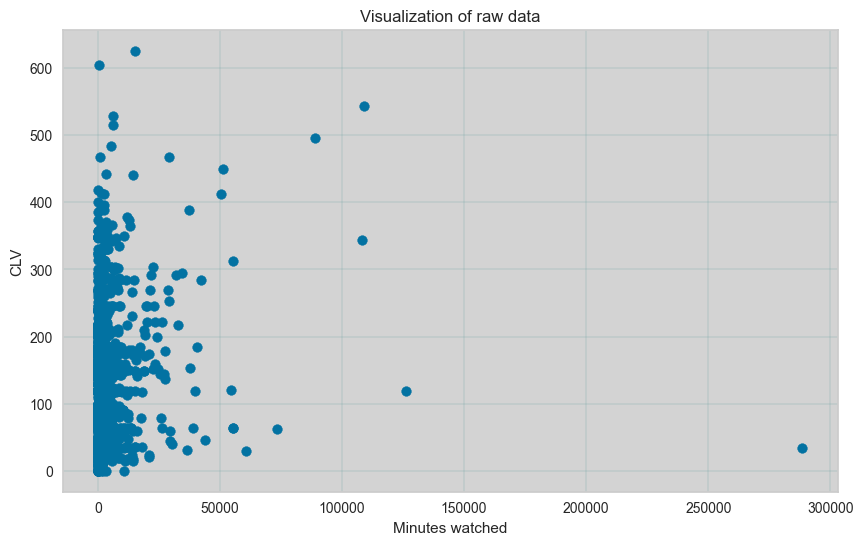

In [20]:
# Setting the plot's size
plt.figure(figsize = (10, 6))

# Personalize the grid
plt.gca().set_facecolor('lightgray')
plt.grid(color='cadetblue', linestyle='-', linewidth=0.2)

# Plotting the scatter using the first and second columns of the customer_seg_cleaned_df
plt.scatter(customer_seg_cleaned_df.iloc[:, 0], customer_seg_cleaned_df.iloc[:, 1])

# Label X axis
plt.xlabel('Minutes watched')

# Label Y axis
plt.ylabel('CLV')

# Give a title to the plot
plt.title('Visualization of raw data')

# Save the figure if needed (a good practice)
# plt.savefig("scatter.png")

# Show the plot
plt.show()

To improve our analysis, we will conduct feature engineering, focusing on optimizing the 'region' and 'channel' variables to unveil valuable insights and identify profitable segments.

<a id="5"></a> <br>
## Feature Engineering

In [21]:
# Extract region variable from the DF
df_region = customer_seg_cleaned_df['region']
df_region.sample(10)

2914    2
3064    2
266     2
2975    0
811     2
1363    1
2600    2
2194    1
75      0
514     1
Name: region, dtype: int64

In [22]:
# Extract channel variable from the DF
df_channel = customer_seg_cleaned_df['channel']
df_channel.sample(10)

1470    4
2699    6
1916    7
2005    3
957     5
3374    2
3397    3
2774    3
315     3
799     3
Name: channel, dtype: int64

### Strategic Enhancement: Introducing Dummy Data for the 'channel' Variable

In [23]:
# identical dummies for the channel of aquisition
channel_dummies_df = pd.get_dummies(df_channel, prefix='channel').astype(int)

# Join the dummy variables to the original dataframe
segment_dummies_1 = pd.concat([customer_seg_cleaned_df,channel_dummies_df], axis=1)
segment_dummies_1.sample(10)

,minutes_watched,CLV,region,channel,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
2030,103,119,2,2,0,1,0,0,0,0,0,0
2712,0,151,2,2,0,1,0,0,0,0,0,0
2761,0,216,0,7,0,0,0,0,0,0,1,0
1042,50463,412,0,1,1,0,0,0,0,0,0,0
2541,1837,96,2,3,0,0,1,0,0,0,0,0
2056,15,119,2,8,0,0,0,0,0,0,0,1
1711,3459,23,1,8,0,0,0,0,0,0,0,1
3489,537,19,2,2,0,1,0,0,0,0,0,0
2647,91,174,1,1,1,0,0,0,0,0,0,0
808,12,78,2,4,0,0,0,1,0,0,0,0


### Strategic Enhancement: Introducing Dummy Data for the 'region' Variable

In [24]:
# Get dummy variables for each unique value in 'region'
region_df_dummies = pd.get_dummies(customer_seg_cleaned_df['region'], prefix='region').astype(int)

# Join the dummy variables to original dataframe
segment_dummies_12 = pd.concat([segment_dummies_1,region_df_dummies], axis=1)
segment_dummies_12.sample(10)

,minutes_watched,CLV,region,channel,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,region_0,region_1,region_2
2840,0,199,0,8,0,0,0,0,0,0,0,1,1,0,0
3053,895,467,0,2,0,1,0,0,0,0,0,0,1,0,0
3710,1218,86,2,6,0,0,0,0,0,1,0,0,0,0,1
1015,1545,119,0,1,1,0,0,0,0,0,0,0,1,0,0
1413,1321,67,2,4,0,0,0,1,0,0,0,0,0,0,1
2262,0,62,2,8,0,0,0,0,0,0,0,1,0,0,1
3679,17,164,0,3,0,0,1,0,0,0,0,0,1,0,0
3063,485,285,1,3,0,0,1,0,0,0,0,0,0,1,0
18,51411,449,2,3,0,0,1,0,0,0,0,0,0,0,1
2646,2406,19,2,3,0,0,1,0,0,0,0,0,0,0,1


<a id="6"></a> <br>
## Clustering Insights: K-Means and Hierarchical Methods

### Customer Segmentation DataFrame

In [25]:
segmentation_df = segment_dummies_12.copy()
segmentation_df.drop(columns={'channel', 'region'}, inplace=True)
segmentation_df.sample(10)

,minutes_watched,CLV,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,region_0,region_1,region_2
829,69,119,0,0,0,1,0,0,0,0,0,0,1
2730,540,156,0,0,1,0,0,0,0,0,1,0,0
2400,72,138,0,0,1,0,0,0,0,0,0,0,1
2804,0,164,0,0,1,0,0,0,0,0,1,0,0
2665,31,77,0,0,0,0,0,0,1,0,0,0,1
1035,2604,62,0,0,0,0,0,0,0,1,0,0,1
691,96,199,0,0,0,1,0,0,0,0,1,0,0
132,927,212,1,0,0,0,0,0,0,0,0,1,0
241,229,174,0,0,0,1,0,0,0,0,1,0,0
2822,1186,91,0,0,0,0,0,1,0,0,0,0,1


In [26]:
segmentation_df.rename(columns = {'channel_1':'Google', 'channel_2':'Facebook', 'channel_3':'YouTube','channel_4':'LinkedIn', 
                                                    'channel_5':'Twitter', 'channel_6':'Instagram', 'channel_7':'Friend', 'channel_8':'Other'}, inplace=True)

In [27]:
segmentation_df.head()

,minutes_watched,CLV,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,region_0,region_1,region_2
0,3197,205,0,0,0,1,0,0,0,0,0,0,1
1,63,149,1,0,0,0,0,0,0,0,1,0,0
2,605,119,0,1,0,0,0,0,0,0,0,0,1
3,20,240,0,0,0,1,0,0,0,0,0,0,1
4,245,184,0,0,0,1,0,0,0,0,0,1,0


<a id="10"></a><br>
### Standardizing Data for Uniformity and Analysis

Before implementing k-means and hierarchical clustering techniques, we must perform a crucial step: data standardization. Without it, our results will likely be unreliable or skewed especially considering such a difference in magnitude regarding minutes watched versus CLV, as we saw in the scatter plot.

In [28]:
scaler = StandardScaler()

# Standardization means transforming the data so that it has a mean of 0 and a standard deviation of 1 for each feature.
segmentation_scaled = scaler.fit_transform(segmentation_df)
segmentation_scaled

array([[ 0.17542513,  1.23494169, -0.46058699, ..., -0.74396546,
        -0.36969391,  0.95410372],
       [-0.25376647,  0.43987938,  2.17114254, ...,  1.34414843,
        -0.36969391, -1.04810408],
       [-0.17954125,  0.01395314, -0.46058699, ..., -0.74396546,
        -0.36969391,  0.95410372],
       ...,
       [-0.25458815, -1.16444278, -0.46058699, ..., -0.74396546,
        -0.36969391,  0.95410372],
       [-0.25636846, -1.16444278,  2.17114254, ..., -0.74396546,
        -0.36969391,  0.95410372],
       [-0.26239413, -0.55394851, -0.46058699, ...,  1.34414843,
        -0.36969391, -1.04810408]])

<a id="11"></a><br>
### Determining Optimal Clusters' number

#### Optimal Number of Clusters : the Elbow Method

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

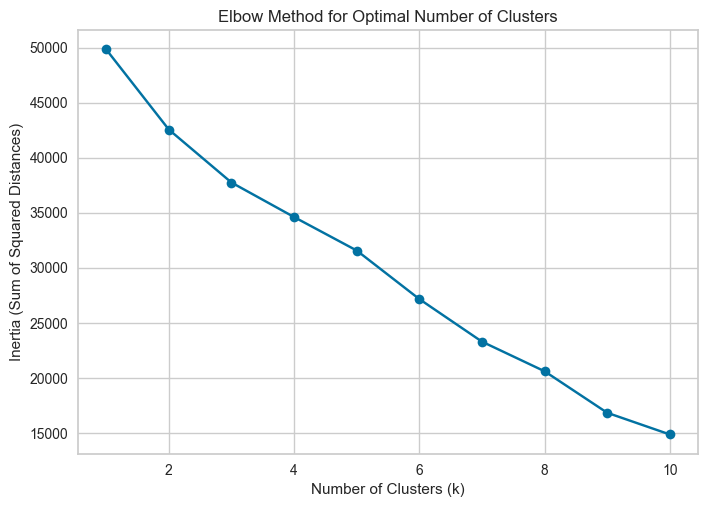

In [29]:
# Run K-means for a range of clusters
# Initializing an empty list to store the Within-Cluster-Sum-of-Squares (WCSS), also called inertia, for different cluster numbers.
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(segmentation_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

Even in the absence of a well-defined elbow, we try to identify the point where the rate of decrease in inertia starts to slow down. This might be a subjective assessment based on visual inspection.

Here we can observe that the elbow method points to 2, 6 or 8 clusters as "a" solution.

Since it is difficult to choose a number of clusters using the elbow method, let's try other methods such as the Silhouette Score and Gap Statistics.

Optimal Number of Clusters : Silhouette Score

This method measures how well-defined the clusters are. It ranges from -1 to 1, with higher values indicating better-defined clusters. You can calculate the silhouette score for different cluster numbers and choose the number with the highest score.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

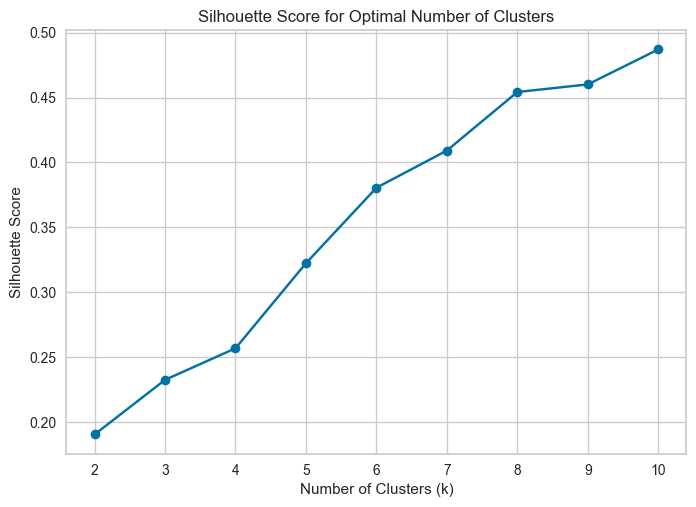

In [30]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=100)
    labels = kmeans.fit_predict(segmentation_scaled)
    silhouette_scores.append(silhouette_score(segmentation_scaled, labels))

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

While 8 serves as a viable solution, let's elevate our approach by exploring an alternative method for even more nuanced results.

#### Optimal Number of Clusters : Gap Statistics
Gap statistics compares the inertia of the clustering algorithm on the actual data to the inertia on randomly generated data. A larger gap indicates that the clusters in the actual data are more significant than what would be expected by random chance.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

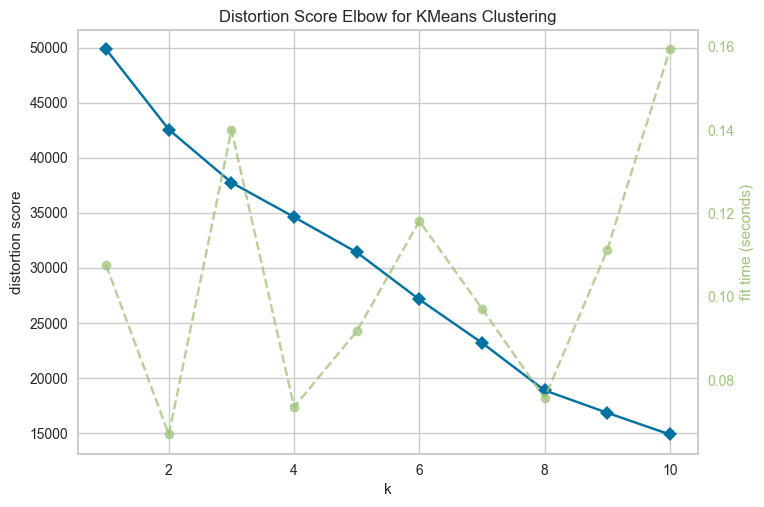

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# Assuming X_scaled is your standardized data
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(segmentation_scaled)        # Fit the data to the visualizer
visualizer.show()                       # Finalize and render the figure

As we can read in this visualization, the biggest jump (gap) is observed at k = 8.

After employing the three methods, we have determined that a configuration with 8 clusters is the optimal choice.

Now using this configuration, let's execute clustering to segment the customers.

<a id="12"></a><br>
### Executing K-Means Algorithm for Data Clustering

### K-Means Clustering

K-Means Clustering is a powerful algorithm used for grouping similar data points into distinct clusters. The process involves specifying the number of clusters (K) to classify the dataset. Various methods, such as the Elbow method, Silhouette Score, and Gap Statistics, help determine the optimal number of clusters.

The algorithm initiates by randomly selecting 'K' centroids, which act as the initial cluster centers. Subsequently, it iteratively calculates the Euclidean distance between each data point and the centroids. The centroids are then updated to become the centers of gravity for their respective clusters. This process repeats until convergence, with data points assigned to clusters based on their proximity to the centroid.

The term "K-Means" originates from the updating step, where centroids are essentially the means of the data points within each cluster. This iterative refinement results in the algorithm converging to a solution where each data point is labeled according to its minimum distance from the centroids. The K-Means Clustering technique is particularly useful in uncovering patterns and structure within datasets, aiding in the exploration and understanding of underlying data relationships.

In [32]:
# Run the algorithm with 8 clusters
kmeans = KMeans(n_clusters=8, init='k-means++',random_state=42)
kmeans.fit_predict(segmentation_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([5, 3, 4, ..., 4, 3, 0], dtype=int32)

In [33]:
# Creating a copy of the original 'df_segmentation' dataframe to avoid modifying it directly.
df_kmeans = segmentation_df.copy()

# Assigning the cluster labels generated by k-means to a new column named 'Segment' in the copied dataframe.
df_kmeans['Segment'] = kmeans.labels_
df_kmeans.sample(10)

,minutes_watched,CLV,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,region_0,region_1,region_2,Segment
3613,7,130,1,0,0,0,0,0,0,0,1,0,0,3
1911,878,141,0,0,1,0,0,0,0,0,0,1,0,0
21,1574,180,0,0,0,0,0,1,0,0,0,1,0,7
2548,75,179,0,0,0,0,0,0,1,0,0,1,0,2
2663,527,77,0,0,1,0,0,0,0,0,0,0,1,1
3244,263,36,0,0,0,1,0,0,0,0,0,0,1,5
336,220,184,0,0,1,0,0,0,0,0,1,0,0,0
1393,37,118,0,0,0,0,0,0,0,1,1,0,0,6
2668,1348,146,0,0,1,0,0,0,0,0,0,0,1,1
3648,3,147,0,0,0,1,0,0,0,0,0,0,1,5


In [34]:
df_analysis = df_kmeans.groupby('Segment').mean()
df_analysis

,minutes_watched,CLV,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,region_0,region_1,region_2
Segment,,,,,,,,,,,,,
0,1523.389744,149.377778,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.779487,0.217094,0.003419
1,2397.181658,103.631393,0.0,0.0,0.897707,0.0,0.102293,0.0,0.0,0.0,0.017637,0.005291,0.977072
2,2006.190377,113.276151,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.257322,0.112971,0.629707
3,1810.359165,120.758569,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.390462,0.120715,0.488823
4,2767.643791,107.901961,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.287582,0.101307,0.611111
5,1589.376923,107.027692,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,0.0,0.290769,0.107692,0.601538
6,2314.083333,122.871528,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.513889,0.138889,0.347222
7,1299.332180,114.826990,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.311419,0.190311,0.498270


This helps us to well define our segments :

* Segment 0: Customers who discovered the platform through YouTube, primarily from USA and Canada.
* Segment 1: Customers who discovered the platform through both YouTube and Twitter, predominantly from the rest of the world.
* Segment 2: Customers who learned about the platform from a friend, mainly from the rest of the world.
* Segment 3: Customers who discovered the platform through Google search, spanning USA, Canada, and the rest of the world (excluding Europe).
* Segment 4: Customers who found the platform through Facebook, mostly from the rest of the world.
* Segment 5: Customers who discovered the platform via LinkedIn, mainly from the rest of the world.
* Segment 6: Customers who learned about the platform through other channels, primarily from USA and Canada.
* Segment 7: Customers who discovered the platform on Instagram, covering USA, Canada, and the rest of the world (excluding Europe).

In [35]:
# Perform descriptive statistics analysis by segment
df_analysis = df_kmeans.groupby('Segment').describe().round(2)
df_analysis[['minutes_watched', 'CLV']]

minutes_watched                                                  \
                  count     mean       std  min     25%    50%      75%   
Segment                                                                   
0                 585.0  1523.39   3869.72  0.0  116.00  402.0  1211.00   
1                 567.0  2397.18   8696.58  0.0  159.00  487.0  1544.00   
2                 478.0  2006.19   6073.62  0.0  203.75  541.5  1640.75   
3                 671.0  1810.36   4475.52  0.0  130.00  484.0  1600.00   
4                 306.0  2767.64  17174.25  0.0  167.25  557.0  1560.50   
5                 650.0  1589.38   4252.93  0.0  133.75  484.0  1415.50   
6                 288.0  2314.08   7731.12  0.0   94.00  418.0  1376.00   
7                 289.0  1299.33   2843.99  0.0  132.00  464.0  1297.00   

                     CLV                                                    
              max  count    mean    std   min    25%    50%     75%    max  
Segment                                                                     
0         42437.0  585.0  149.38  75.49  19.0  119.0  149.0  178.00  626.0  
1        126132.0  567.0  103.63  67.94   0.0   62.0   86.0  149.00  449.0  
2         89131.0  478.0  113.28  70.01   0.0   62.0  118.0  149.00  496.0  
3         55284.0  671.0  120.76  75.92   0.0   62.0  119.0  150.50  528.0  
4        288508.0  306.0  107.90  65.12   0.0   62.0  119.0  145.75  467.0  
5         73258.0  650.0  107.03  57.06   1.0   62.0  119.0  138.00  365.0  
6        109109.0  288.0  122.87  71.91   0.0   64.0  119.0  151.00  543.0  
7         32947.0  289.0  114.83  63.53   0.0   62.0  119.0  150.00  386.0

* Minutes Watched:
The 4th Segment has the longest average learning time on the platform (2767.64 min), significantly surpassing the typical duration (median of 557 min), indicating a skewed distribution towards extended learning durations. The highest variability in learning time is found in Segment 1 (8696.58 min), indicating diverse engagement patterns.

* CLV: Segment 0 exhibits a notable distinction, boasting the highest average CLV at 149.38. This value closely aligns with the typical value (median of 149.0), suggesting a centered distribution with a focus on higher customer lifetime values. The spending behavior within Segment 3 (and 0) also show the highest variability (std=75.92, 75.49 respectively), suggesting diverse customer values.

In [38]:

df_analysis.rename(index=
                        {0:'Youtube-region0',
                         1:'Youtube&Twitter-region2',
                         2:'Friends\'Influence-region2',
                         3:'Google-region20',
                         4:'Facebook-region2',
                         5:'LinkedIn-region2',
                         6:'Other-region0',
                         7:'Instgram-region20', 
                        }, inplace=True)
df_analysis

minutes_watched                                  \
                                    count     mean       std  min     25%   
Segment                                                                     
Youtube-region0                     585.0  1523.39   3869.72  0.0  116.00   
Youtube&Twitter-region2             567.0  2397.18   8696.58  0.0  159.00   
Friends'Influence-region2           478.0  2006.19   6073.62  0.0  203.75   
Google-region20                     671.0  1810.36   4475.52  0.0  130.00   
Facebook-region2                    306.0  2767.64  17174.25  0.0  167.25   
LinkedIn-region2                    650.0  1589.38   4252.93  0.0  133.75   
Other-region0                       288.0  2314.08   7731.12  0.0   94.00   
Instgram-region20                   289.0  1299.33   2843.99  0.0  132.00   

                                                       CLV          ...  \
                             50%      75%       max  count    mean  ...   
Segment                                                             ...   
Youtube-region0            402.0  1211.00   42437.0  585.0  149.38  ...   
Youtube&Twitter-region2    487.0  1544.00  126132.0  567.0  103.63  ...   
Friends'Influence-region2  541.5  1640.75   89131.0  478.0  113.28  ...   
Google-region20            484.0  1600.00   55284.0  671.0  120.76  ...   
Facebook-region2           557.0  1560.50  288508.0  306.0  107.90  ...   
LinkedIn-region2           484.0  1415.50   73258.0  650.0  107.03  ...   
Other-region0              418.0  1376.00  109109.0  288.0  122.87  ...   
Instgram-region20          464.0  1297.00   32947.0  289.0  114.83  ...   

                          region_1      region_2                             \
                               75%  max    count  mean   std  min  25%  50%   
Segment                                                                       
Youtube-region0                0.0  1.0    585.0  0.00  0.06  0.0  0.0  0.0   
Youtube&Twitter-region2        0.0  1.0    567.0  0.98  0.15  0.0  1.0  1.0   
Friends'Influence-region2      0.0  1.0    478.0  0.63  0.48  0.0  0.0  1.0   
Google-region20                0.0  1.0    671.0  0.49  0.50  0.0  0.0  0.0   
Facebook-region2               0.0  1.0    306.0  0.61  0.49  0.0  0.0  1.0   
LinkedIn-region2               0.0  1.0    650.0  0.60  0.49  0.0  0.0  1.0   
Other-region0                  0.0  1.0    288.0  0.35  0.48  0.0  0.0  0.0   
Instgram-region20              0.0  1.0    289.0  0.50  0.50  0.0  0.0  0.0   

                                     
                           75%  max  
Segment                              
Youtube-region0            0.0  1.0  
Youtube&Twitter-region2    1.0  1.0  
Friends'Influence-region2  1.0  1.0  
Google-region20            1.0  1.0  
Facebook-region2           1.0  1.0  
LinkedIn-region2           1.0  1.0  
Other-region0              1.0  1.0  
Instgram-region20          1.0  1.0  

[8 rows x 104 columns]

In [39]:
# Mapping the cluster numbers (Segment) to more human-readable labels using a dictionary.
# This helps in interpreting the clusters in plots and other visualizations.
df_kmeans['Labels'] = df_kmeans['Segment'].map(
                        {0:'Youtube-region0',
                         1:'Youtube&Twitter-region2',
                         2:'Friends\'Influence-region2',
                         3:'Google-region20',
                         4:'Facebook-region2',
                         5:'LinkedIn-region2',
                         6:'Other-region0',
                         7:'Instgram-region20', 
                        })

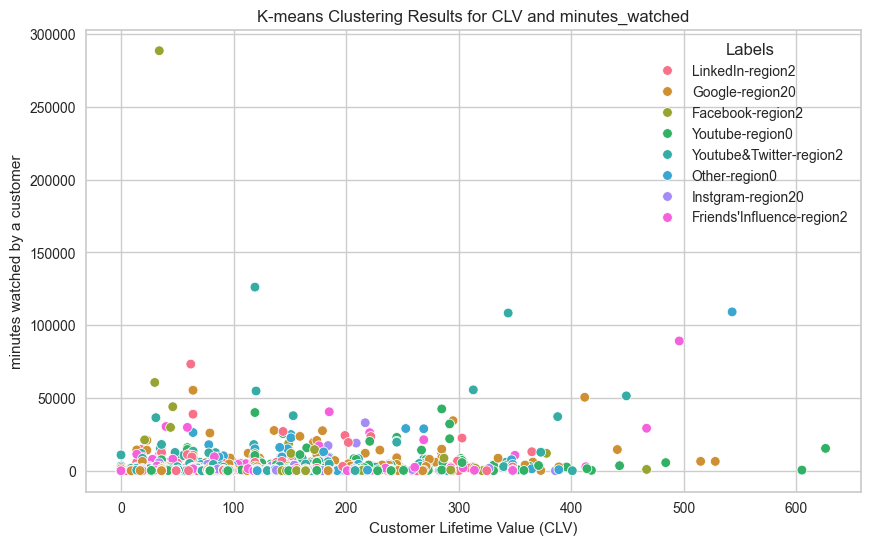

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_kmeans['CLV'], y=df_kmeans['minutes_watched'], hue=df_kmeans['Labels'])
plt.title('K-means Clustering Results for CLV and minutes_watched')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('minutes watched by a customer')
plt.show()

<a id="13"></a><br>
### Unveiling Patterns: Exploring Data Structures with Hierarchical Clustering

#### What is Hierarchical clustering ?

Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters. It can be visualized using a tree-like diagram called a dendrogram. In hierarchical clustering, each data point starts as its own cluster, and the algorithm iteratively merges or splits clusters based on their similarity until all data points belong to a single cluster.

There are two main types of hierarchical clustering:

1. Agglomerative Hierarchical Clustering: This is the most common approach. It starts with each data point as a separate cluster and merges the most similar clusters at each step until all data points belong to a single cluster.
2. Divisive Hierarchical Clustering: This starts with all data points in a single cluster and recursively splits the least similar clusters until each data point is its own cluster.


In [41]:
# Performing hierarchical clustering on the standardized data using the 'ward' method.
# The 'ward' method minimizes the sum of squared differences within all clusters.
hier_cluster = linkage(segmentation_scaled, method='ward') # Linkage matrix

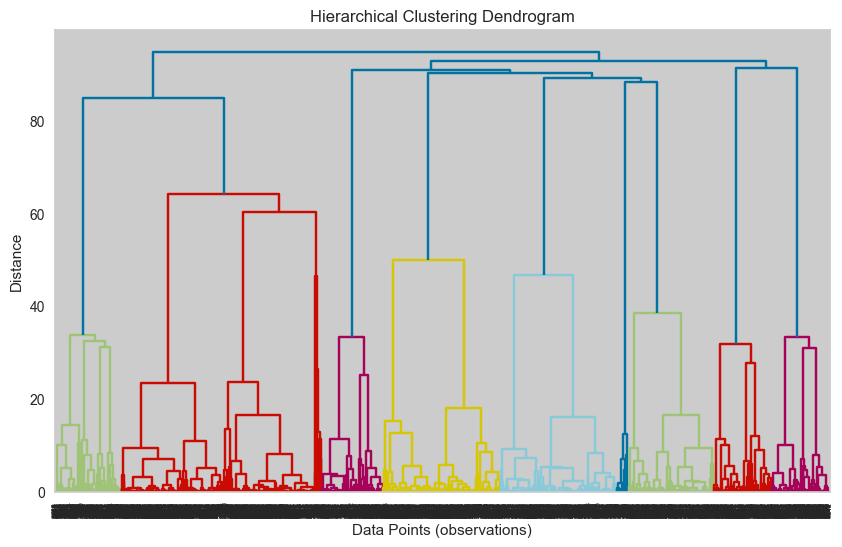

In [42]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))

# Run the algorithm
dendrogram(hier_cluster, truncate_mode='level', show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points (observations)')
plt.ylabel('Distance')
plt.show()
# plt.savefig('Hierarchical_customer_seg.png')

The dendrogram helps us choose the optimal number of clusters.

We can observe where the distance along the y-axis increases drastically, choose to truncate the dendrogram at that point and use the distance as the threshold to form clusters.

At distance = 80 we count 9 vertical lines that correspond to 9 clusters.

Note that the determination of the number of clusters can be somewhat subjective, and there may not be a clear-cut answer. Exploring different cut levels and considering the characteristics of the data is often necessary.

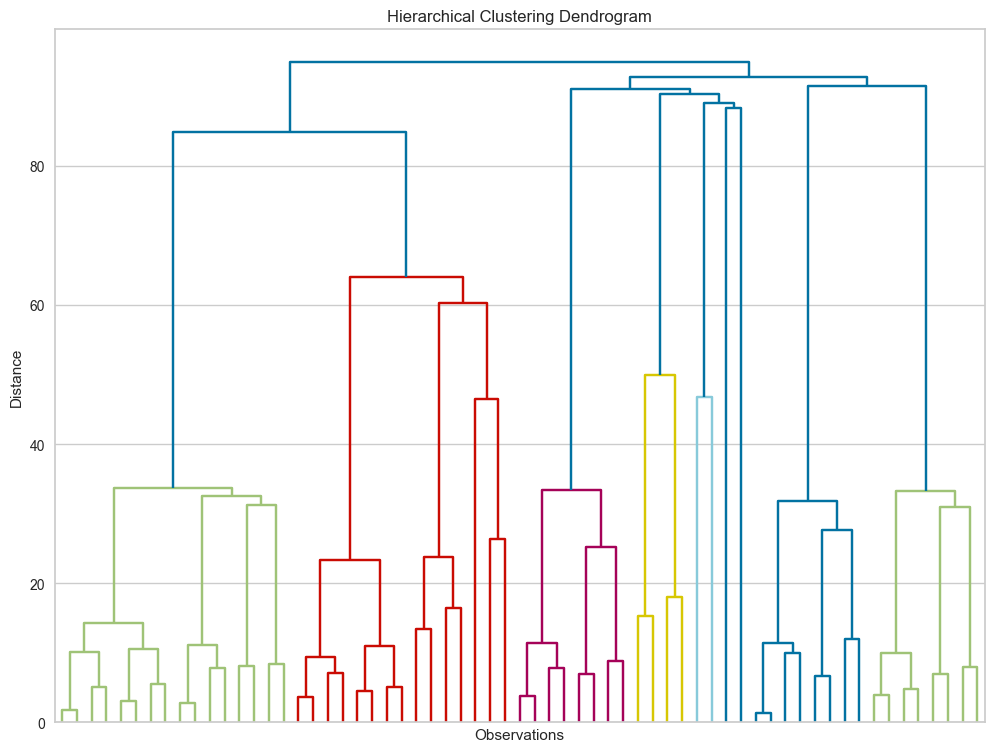

In [43]:
# Plot the dendrogram with a specific number of levels of the dendrogram display (p-value)
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_cluster,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()